In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data.csv')
data.head(3)

,tweet_id,sentiment,name,text,tweet_created,tweet_location,user_timezone
0,1,neutral,cairdin,What @dhepburn said.,24/02/15 11:35,NaN,Eastern Time (US & Canada)
1,2,positive,jnardino,plus you've added commercials to the experienc...,24/02/15 11:15,NaN,Pacific Time (US & Canada)
2,3,neutral,yvonnalynn,I didn't today... Must mean I need to take ano...,24/02/15 11:15,Lets Play,Central Time (US & Canada)


In [3]:
data.isna().sum()

tweet_id             0
sentiment            0
name                 0
text                 0
tweet_created        0
tweet_location    4733
user_timezone     4820
dtype: int64

In [4]:
data.nunique()

tweet_id          14640
sentiment             3
name               7701
text              14318
tweet_created      6804
tweet_location     3078
user_timezone        85
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X = data[['tweet_id', 'text']]
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
train_ids = X_train['tweet_id'].tolist()
len(train_ids)

9808

In [7]:
train = data[data['tweet_id'].isin(train_ids)]

In [8]:
train.head()

,tweet_id,sentiment,name,text,tweet_created,tweet_location,user_timezone
1,2,positive,jnardino,plus you've added commercials to the experienc...,24/02/15 11:15,NaN,Pacific Time (US & Canada)
2,3,neutral,yvonnalynn,I didn't today... Must mean I need to take ano...,24/02/15 11:15,Lets Play,Central Time (US & Canada)
4,5,negative,jnardino,and it's a really big bad thing about it,24/02/15 11:14,NaN,Pacific Time (US & Canada)
5,6,negative,jnardino,seriously would pay $30 a flight for seats tha...,24/02/15 11:14,NaN,Pacific Time (US & Canada)
6,7,positive,cjmcginnis,"yes, nearly every time I fly VX this __ar worm...",24/02/15 11:13,San Francisco CA,Pacific Time (US & Canada)


In [9]:
train.nunique()

tweet_id          9808
sentiment            3
name              5993
text              9642
tweet_created     5600
tweet_location    2476
user_timezone       77
dtype: int64

In [10]:
ids = data['tweet_id'].tolist()
test_ids = set(ids)-set(train_ids)

In [11]:
len(test_ids)

4832

In [12]:
test = data[data['tweet_id'].isin(test_ids)]
test.head(3)

,tweet_id,sentiment,name,text,tweet_created,tweet_location,user_timezone
0,1,neutral,cairdin,What @dhepburn said.,24/02/15 11:35,NaN,Eastern Time (US & Canada)
3,4,negative,jnardino,"it's really aggressive to blast obnoxious ""ent...",24/02/15 11:15,NaN,Pacific Time (US & Canada)
8,9,positive,dhepburn,"Well, I didn't_but NOW I DO! :-D",24/02/15 11:11,San Diego,Pacific Time (US & Canada)


In [13]:
test.nunique()

tweet_id          4832
sentiment            3
name              3541
text              4779
tweet_created     3567
tweet_location    1564
user_timezone       59
dtype: int64

## Missing values

In [14]:
#Missing values in training set
train.isnull().sum()

tweet_id             0
sentiment            0
name                 0
text                 0
tweet_created        0
tweet_location    3157
user_timezone     3178
dtype: int64

In [15]:
#Missing values in test set
test.isnull().sum()

tweet_id             0
sentiment            0
name                 0
text                 0
tweet_created        0
tweet_location    1576
user_timezone     1642
dtype: int64

In [16]:
#Droping the missing values
train = train.dropna()

In [17]:
# Distribution of sentiment

In [18]:
train['sentiment'].value_counts()

negative    3129
neutral     1140
positive     959
Name: sentiment, dtype: int64

In [19]:
train['sentiment'].value_counts(normalize=True)

negative    0.598508
neutral     0.218057
positive    0.183435
Name: sentiment, dtype: float64

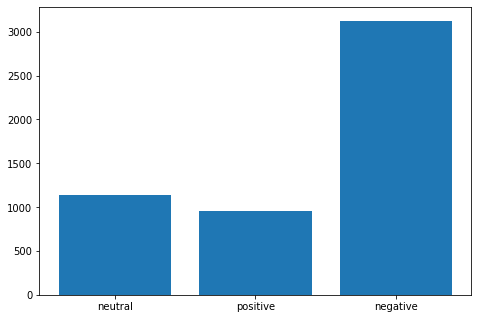

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_plt=train['sentiment'].unique().tolist()
y_plt=[]
for i in x_plt:
    y_plt_df = train[train['sentiment']==i]
    j=y_plt_df['sentiment'].count().tolist()
    y_plt.append(j)
ax.bar(x_plt,y_plt)
plt.show()

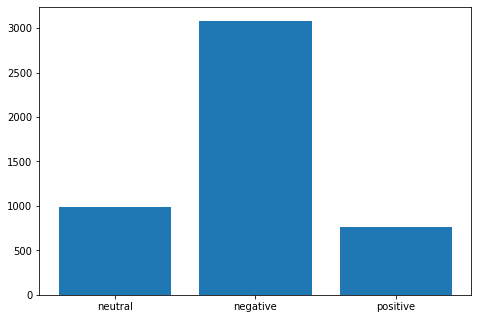

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_plt=test['sentiment'].unique().tolist()
y_plt=[]
for i in x_plt:
    y_plt_df = test[test['sentiment']==i]
    j=y_plt_df['sentiment'].count().tolist()
    y_plt.append(j)
ax.bar(x_plt,y_plt)
plt.show()

In [22]:
# text preprocessing helper functions

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [23]:
import nltk
import re
import string

# Applying the cleaning function to both test and training datasets
train['text_clean'] = train['text'].apply(str).apply(lambda x: text_preprocessing(x))
test['text_clean'] = test['text'].apply(str).apply(lambda x: text_preprocessing(x))

C:\Users\duhita\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [24]:
train.head(3)

,tweet_id,sentiment,name,text,tweet_created,tweet_location,user_timezone,text_clean
2,3,neutral,yvonnalynn,I didn't today... Must mean I need to take ano...,24/02/15 11:15,Lets Play,Central Time (US & Canada),i didnt today must mean i need to take another...
6,7,positive,cjmcginnis,"yes, nearly every time I fly VX this __ar worm...",24/02/15 11:13,San Francisco CA,Pacific Time (US & Canada),yes nearly every time i fly vx this ar worm wo...
7,8,neutral,pilot,Really missed a prime opportunity for Men With...,24/02/15 11:12,Los Angeles,Pacific Time (US & Canada),really missed a prime opportunity for men with...


In [25]:
test.head(3)

,tweet_id,sentiment,name,text,tweet_created,tweet_location,user_timezone,text_clean
0,1,neutral,cairdin,What @dhepburn said.,24/02/15 11:35,NaN,Eastern Time (US & Canada),what dhepburn said
3,4,negative,jnardino,"it's really aggressive to blast obnoxious ""ent...",24/02/15 11:15,NaN,Pacific Time (US & Canada),its really aggressive to blast obnoxious enter...
8,9,positive,dhepburn,"Well, I didn't_but NOW I DO! :-D",24/02/15 11:11,San Diego,Pacific Time (US & Canada),well i didntbut now i do d


In [26]:
train['text_len'] = train['text_clean'].astype(str).apply(len)
train['text_word_count'] = train['text_clean'].apply(lambda x: len(str(x).split()))

In [27]:
train.head(3)

,tweet_id,sentiment,name,text,tweet_created,tweet_location,user_timezone,text_clean,text_len,text_word_count
2,3,neutral,yvonnalynn,I didn't today... Must mean I need to take ano...,24/02/15 11:15,Lets Play,Central Time (US & Canada),i didnt today must mean i need to take another...,51,11
6,7,positive,cjmcginnis,"yes, nearly every time I fly VX this __ar worm...",24/02/15 11:13,San Francisco CA,Pacific Time (US & Canada),yes nearly every time i fly vx this ar worm wo...,55,13
7,8,neutral,pilot,Really missed a prime opportunity for Men With...,24/02/15 11:12,Los Angeles,Pacific Time (US & Canada),really missed a prime opportunity for men with...,67,11


In [28]:
pos = train[train['sentiment']=='positive']
neg = train[train['sentiment']=='negative']
neutral = train[train['sentiment']=='neutral']

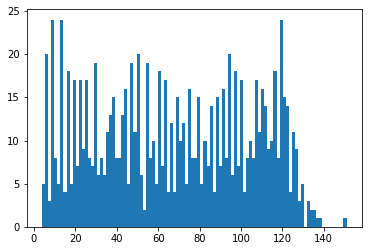

In [29]:
import matplotlib.pyplot as plt

x_pos = pos['text_len'].tolist()
plt.hist(x_pos, bins = 100)
plt.show()

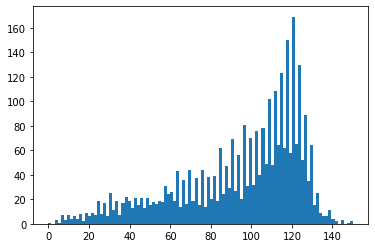

In [30]:
import matplotlib.pyplot as plt

x_neg = neg['text_len'].tolist()
plt.hist(x_neg, bins = 100)
plt.show()

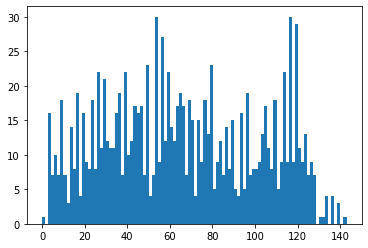

In [31]:
import matplotlib.pyplot as plt

x_neu = neutral['text_len'].tolist()
plt.hist(x_neu, bins = 100)
plt.show()

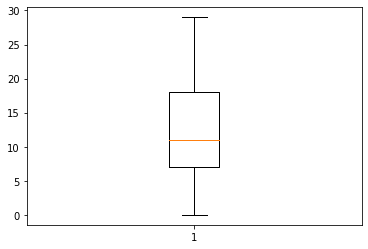

In [32]:
w_neu = neutral['text_word_count'].tolist()
plt.boxplot(w_neu)
plt.show()

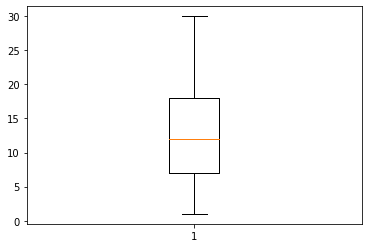

In [33]:
w_pos = pos['text_word_count'].tolist()
plt.boxplot(w_pos)
plt.show()

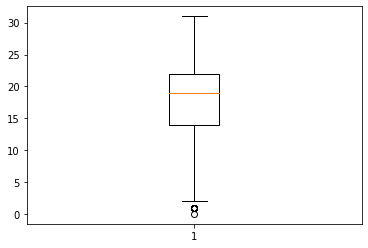

In [34]:
w_neg = neg['text_word_count'].tolist()
plt.boxplot(w_neg)
plt.show()

In [35]:
sentences = train['text'].tolist()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'didn': 2594,
 'today': 7517,
 'must': 5156,
 'mean': 4931,
 'need': 5228,
 'to': 7515,
 'take': 7291,
 'another': 1153,
 'trip': 7613,
 'yes': 8338,
 'nearly': 5226,
 'every': 3022,
 'time': 7489,
 'fly': 3324,
 'vx': 8031,
 'this': 7435,
 '__ar': 814,
 'worm_': 8247,
 'won__': 8226,
 'go': 3610,
 'away': 1362,
 'really': 6167,
 'missed': 5050,
 'prime': 5945,
 'opportunity': 5493,
 'for': 3375,
 'men': 4966,
 'without': 8210,
 'hats': 3805,
 'parody': 5637,
 'there': 7409,
 'https': 3981,
 'co': 2088,
 'mwpg7grezp': 5160,
 'it': 4272,
 'was': 8069,
 'amazing': 1101,
 'and': 1128,
 'arrived': 1257,
 'an': 1121,
 'hour': 3960,
 'early': 2837,
 'you': 8353,
 're': 6149,
 'too': 7533,
 'good': 3627,
 'me': 4927,
 'lt': 4773,
 'pretty': 5932,
 'graphics': 3666,
 'so': 6927,
 'much': 5143,
 'better': 1527,
 'than': 7375,
 'minimal': 5029,
 'iconography': 4026,
 'is': 4261,
 'such': 7169,
 'great': 3670,
 'deal': 2474,
 'already': 1084,
 'thinking': 7430,
 'about': 883,
 'my': 5163,
 '2nd'

In [37]:
count_vectorizer = CountVectorizer(ngram_range=(1,3))
count_vectorizer.fit(sentences)

CountVectorizer(ngram_range=(1, 3))

In [38]:
list(count_vectorizer.vocabulary_)[:20]

['didn',
 'today',
 'must',
 'mean',
 'need',
 'to',
 'take',
 'another',
 'trip',
 'didn today',
 'today must',
 'must mean',
 'mean need',
 'need to',
 'to take',
 'take another',
 'another trip',
 'didn today must',
 'today must mean',
 'must mean need']

In [39]:
!pip install transformers

In [40]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
                 It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe


OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\duhita\anaconda3\lib\site-packages\torch\lib\asmjit.dll" or one of its dependencies.

In [ ]:
 # Tokenizing the first text
print(train['text'][10]) # original sentence
print(tokenizer.tokenize(train['text'][10], add_special_tokens=True))
print(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train['text'][10])))

In [41]:
tokenizer.sep_token, tokenizer.sep_token_id
tokenizer.cls_token, tokenizer.cls_token_id

NameError: name 'tokenizer' is not defined

In [42]:
# calculating length of the longest text

max_len = 0

for text in train['text']:

    # Tokenize the text and add special tokens i.e `[CLS]` and `[SEP]`
    input_ids = tokenizer.encode(text, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))


print('Max length: ', max_len)

NameError: name 'tokenizer' is not defined

In [43]:
text = train['text'].values
sentiment = train['sentiment'].values

input_ids = []
attention_masks = []
token_type_ids = []

for i in range(len(text)):
    encoded = tokenizer.encode_plus(
      sentiment[i],
      text[i],
      add_special_tokens=True,
      max_length=150,
      pad_to_max_length=True,
      return_token_type_ids=True,
      return_attention_mask=True,
      return_tensors='pt'
    )
    
    input_ids.append(encoded['input_ids'])
    attention_masks.append(encoded['attention_mask'])
    token_type_ids.append(encoded['token_type_ids'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
token_type_ids = torch.cat(token_type_ids, dim=0)

print('Original text: ',text[10])
print(len(input_ids[10]))
print(input_ids[10])
print(attention_masks[10])
print(token_type_ids[10])

NameError: name 'tokenizer' is not defined